In [1]:
import json
import glob
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.transform import resize


In [2]:
def extract_img_heatmap(json_pth, visualize = False):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = np.array(loaded_json['heatmap'])
    target = loaded_json['target']
    
    if visualize:
        
        fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
        
        ax1.set_title(json_pth.split('/')[-3] + " // " + target)
        raw_image = Image.open(loaded_json['img'].replace('/root/bjoern/atman_other_model/','/nfs/scratch_2/bjoern/atman_other_model/'))
        raw_image.resize((300,300))
        ax1.imshow(raw_image)
        ax1.axis('off')
        
        im2 = ax2.imshow(x)
    
    return x
    

/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/Camera/images/151.jpg_explanation_chefer3_Camera.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/Camera/images/152.jpg_explanation_chefer3_Camera.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/Camera/images/153.jpg_explanation_chefer3_Camera.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/Camera/images/154.jpg_explanation_chefer3_Camera.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/Camera/images/155.jpg_explanation_chefer3_Camera.json


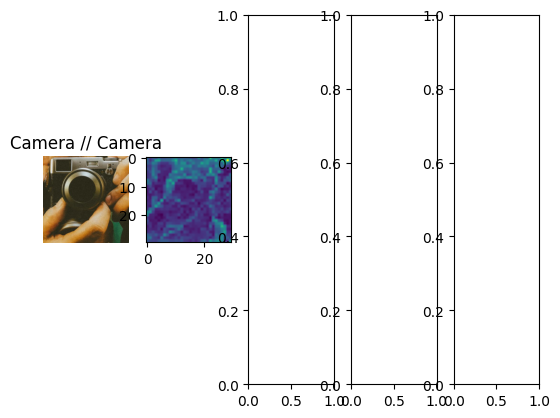

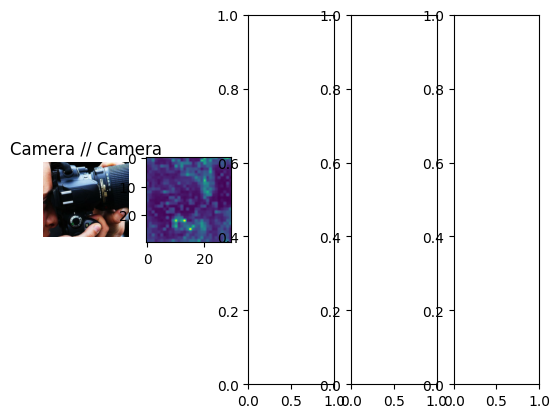

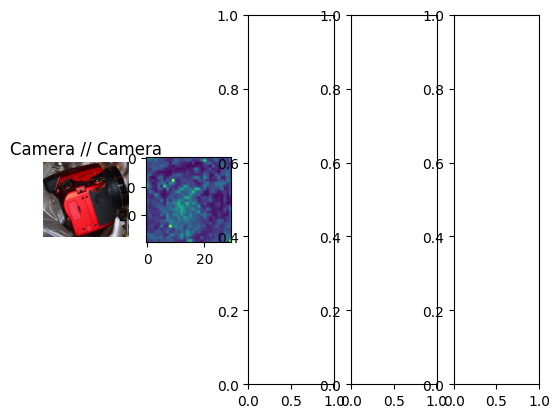

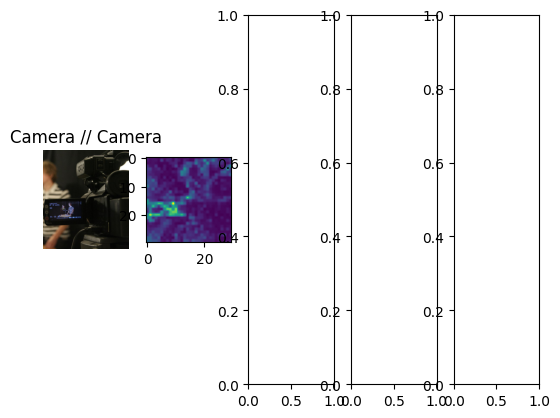

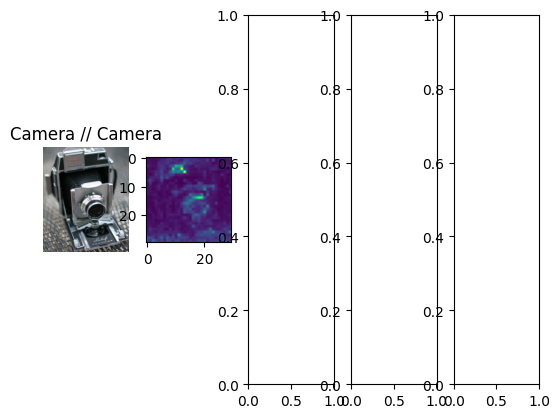

In [3]:

suffix='chefer3'

#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_*Lipstick*')[:]:
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/*/images/*_explanation_{suffix}*')[200:205]: #[40:60]: #[40:50]:
#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/others/BLIP/test_folder/*_explanation_{suffix}*'):
    print(p)
    extract_img_heatmap(p,visualize=True)#, True)

In [4]:
import pickle

In [5]:
def AP(x,y):
    x_abs = np.absolute(x)
    return (x_abs.reshape(-1)*y.reshape(-1)).sum()/x_abs.sum()

def AR(x,y):
    x_abs = np.absolute(x)
    x_norm = x_abs/x_abs.max()
    return (x_norm.reshape(-1)*y.reshape(-1)).sum()/y.sum()

In [6]:
visualize=False
all_aps = []
all_ars = []
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-cleaned-all-classes/*/images/*_explanation_{suffix}*'): #[:5]: #[40:60]: #[40:50]:
    y = extract_img_heatmap(p, visualize=visualize)#, True)
    jpg = p.split('/')[-1].split('_explanation_')[0]
    mask = '/'.join(p.split('/')[:-2]+['masks',jpg])
    mask_array = np.asarray(Image.open(mask).resize((30,30))) > 50 #.numpy()

    all_aps.append(AP(y,mask_array))
    all_ars.append(AR(y,mask_array))

In [7]:
len(all_ars)

27876

In [8]:
sum(all_aps)/len(all_aps), sum(all_ars)/len(all_ars)

(0.5969038155504015, 0.20194038784068397)

In [9]:
iqr = np.percentile(np.array(all_aps),[72,25])
all_aps = np.array(all_aps)
all_ars = np.array(all_ars)
all_aps_iqr = all_aps[all_aps <= iqr[0]]
all_aps_iqr = all_aps_iqr[all_aps_iqr >= iqr[1]]
all_aps_iqr.mean()

0.6027921561419534

In [10]:
iqr = np.percentile(np.array(all_ars),[72,25])
all_ars_iqr = all_ars[all_ars <= iqr[0]]
all_ars_iqr = all_ars_iqr[all_ars_iqr >= iqr[1]]
all_ars_iqr.mean()

0.1935608838583209